COMP PHYS 5630 nSphere example
===============


This notebook illustrates some simple plotting in PYTHON.  First we will import the ROOT Python package.  In the first example below, we'll use ROOT to supply special functions.   There are other Python libraries supplying special functions (eg [SciPy](https://docs.scipy.org/doc/scipy/index.html), but we will often use ROOT librariaes in this class b/c the same code may be used in either C++ or Python programs.

# 1. Python + matplotlib

In [3]:
from math import pi, pow, gamma

def nsphereV(n, r=1): # volume of hypersphere
    if n<0: return 0
    return pow(pi,n/2.0) / gamma(n/2.0+1) * pow(r,n)

def ncubeV(n, L=2):   # volume of hypercube
    if n<0: return 0
    return pow(L,n)

Test our code:

In [5]:
print("V_sphere(n=3,r=1)",nsphereV(3,1))   # 3d, unit radius
print("V_cube(n=3,L=2)",ncubeV(3,2))       # 3d, vertex at +-1 in each dimension

V_sphere(n=3,r=1) 4.1887902047863905
V_cube(n=3,L=2) 8.0


Now let's make a simple plot with matplotlib.  A simple graph in matplotlib is created from two [numpy](https://numpy.org/) arrays.  We first import the needed packages.

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

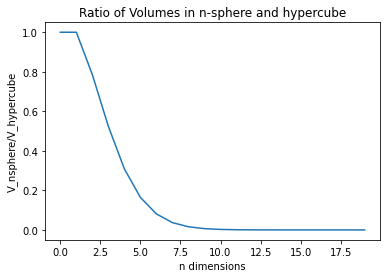

In [7]:
x = np.arange(0, 20)
y = np.zeros(20)
for n in x: 
    y[n] = nsphereV(n,1) / ncubeV(n,2)
plt.plot(x,y)
plt.xlabel('n dimensions')
plt.ylabel('V_nsphere/V_hypercube')
plt.title('Ratio of Volumes in n-sphere and hypercube')
plt.show()

# 2. Making a plot with ROOT

To make the plot below we use the [TGraph class](https://root.cern.ch/doc/master/classTGraph.html) in ROOT.  Here the (x,y) coordinate arrays are stored in the TGraph object.  We first import the pyROOT package.

In [8]:
import ROOT as R

Welcome to JupyROOT 6.22/00


In [9]:
tg1=R.TGraph()  # volumne of n-spheres, radius = 1
for n in range(21):
    tg1.SetPoint(n,n,nsphereV(n,1))

Steps to make the plot:

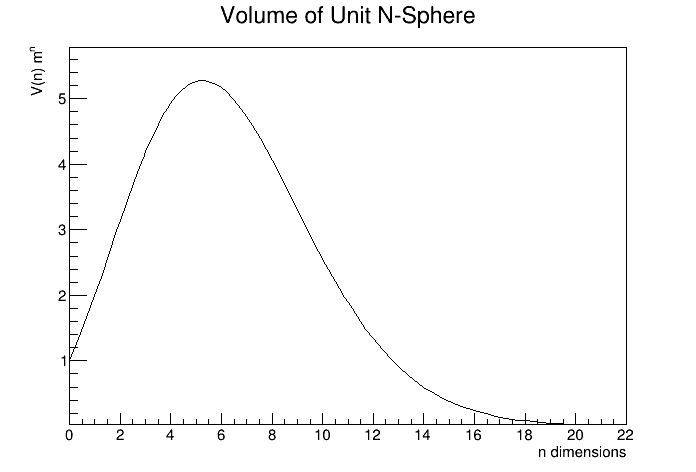

In [10]:
tc=R.TCanvas()
tg1.Draw("AC")  # Draw [Axes], use smooth [Curve]
tg1.SetTitle("Volume of Unit N-Sphere;n dimensions;V(n) m^{n}")
tc.Draw()

# More useful plots for this exercise

The results for the volume calculation span a range that covers many orders of magnitude.  This suggests that a log-y scale should be used.  We aslo want some way to designate which curve corresponds to each of the radii tested.  One approach is to simply label the curves with text strings.    

## Example using pyROOT
The following two plots will be made using ROOT.  Don't worry if the details in the code below are unfamiliar, we will explore some of the plotting tools in ROOT soon.

In [11]:
# setup to scan 1.0 <= R <= 2.0 and 0<=n<=50 (nMax dimensions)
minR=1.0
maxR=2.0
nR=21
dR=(maxR-minR)/(nR-1)
nMax=50

graphs={}  # empty Python dictionary, similar to a map in C++ STL
for m in range(nR):
    r=minR+m*dR
    graphs[m]=R.TGraph()     # for each radius, store a graph of V(dimension)
    for n in range(nMax+1):
        graphs[m].SetPoint(n,n,nsphereV(n,r))

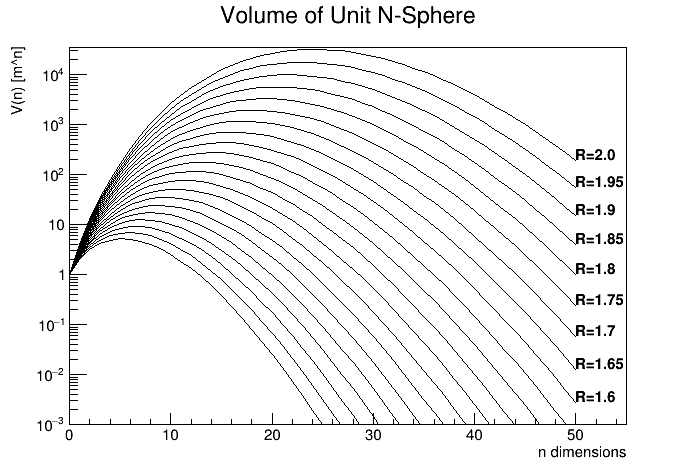

In [12]:
tc=R.TCanvas()
tc.SetLogy()
graphs[nR-1].SetTitle("Volume of Unit N-Sphere;n dimensions;V(n) [m^n]")
yMin=1e-3
graphs[nR-1].SetMinimum(yMin)
graphs[nR-1].Draw("alp")
t=R.TText()
t.SetTextSize(0.035);
for n in range(nR):
    graphs[n].Draw("lp")
    y=graphs[n].GetPointY(nMax)
    if y>yMin: t.DrawText(nMax,y,"R="+str(n/20+1))
tc.Draw()

Here we made a choice to cut off the y-axis at $10^{-3}$.  This is an aesthetic choice.  Some other choice may be dictated by personal style or a specific requirement guiding the layout of the plot.

The above plot isn't bad, but the labels for the lower R values are cut off.  One way to improve the information shonw is to shift and rotate the labels as shown below.

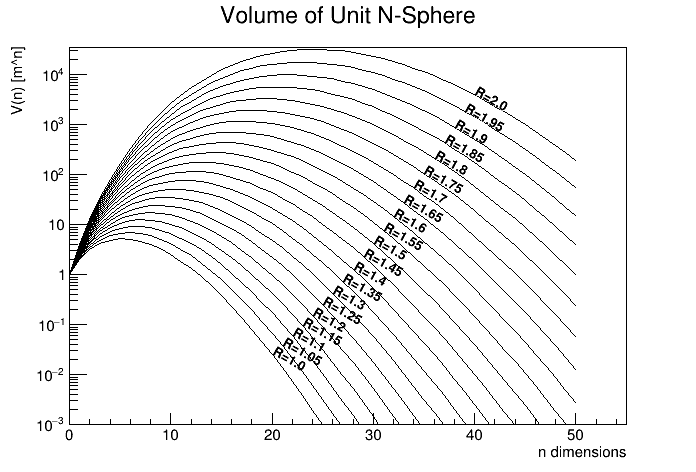

In [13]:
tc=R.TCanvas()
tc.SetLogy()
graphs[nR-1].SetTitle("Volume of Unit N-Sphere;n dimensions;V(n) [m^n]")
yMin=1e-3
graphs[nR-1].SetMinimum(yMin)
graphs[nR-1].Draw("alp")
t=R.TText()
t.SetTextAngle(-30)
t.SetTextSize(0.03);
for n in range(nR):
    graphs[n].Draw("lp")
    x=20+n
    y=graphs[n].Eval(x)
    if y>yMin: t.DrawText(x,y,"R="+str(n/20+1))
tc.Draw()

## Example using matplotlib

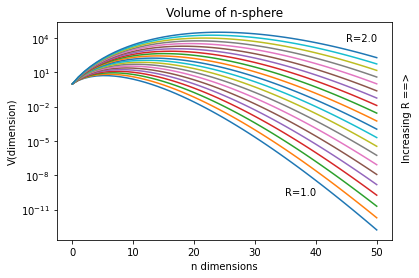

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, nMax+1)
y = np.zeros(nMax+1)
radii = np.arange(1,2.05,0.05)
for r in radii:
    for n in x:
        y[n] = nsphereV(n,r)
    plt.plot(x,y)
plt.yscale('log')
plt.xlabel('n dimensions')
plt.ylabel('V(dimension)')
plt.title('Volume of n-sphere')
plt.text(55, 10, 'Increasing R ==>',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top')
plt.text(35,2e-10,'R=1.0')
plt.text(45,5e3,'R=2.0')
plt.show()

# Advanced: the C++ kernel

As part of the ROOT installation a C++ kernel is provided with Jupyter.

Below we compile a couple of new functions.  
The cells use the "%cpp magic" which calls the [cling interpreter](https://root.cern/cling/) (defined with the installation of [ROOT](https://root.cern.ch/) in our environment). The code is run through a JIT compiler and linked into the ROOT-Python namespace.

In [15]:
%%cpp?

Docstring:
::

  %cpp [-a] [-d]

Executes the content of the cell as C++ code.

optional arguments:
  -a, --aclic    Compile code with ACLiC.
  -d, --declare  Declare functions and/or classes.
File:      ~/miniconda3/envs/phys56xx/lib/python3.8/site-packages/JupyROOT/magics/cppmagic.py


In [16]:
%%cpp -d
double nsphereV(double n, double R=1){ // volume of hypersphere
    if (n<0) return 0;
    return TMath::Power(TMath::Pi(),n/2.0) / TMath::Gamma(n/2.0+1) * TMath::Power(R,n);
}

double ncubeV(double n, double L=2){  // volume of hyper cube
    if (n<0) return 0;
    return TMath::Power(L,n);
}

In [17]:
# cross check
print("C++ version:    V_sphere(n=3,r=1)",R.nsphereV(3,1)) # C++ version in ROOT namespace
print("Python version: V_sphere(n=3,r=1)",nsphereV(3,1))   # Python version

print("V_cube(n=3,L=2)",R.ncubeV(3,2))         # 3d, vertex at +-1 in each dimension

C++ version:    V_sphere(n=3,r=1) 4.188790204786391
Python version: V_sphere(n=3,r=1) 4.1887902047863905
V_cube(n=3,L=2) 8.0


**Warning** I don't recommend **ever** writing C++ in the notebook unless you realy kow what you're doing and have a lot of time on you hands!  It's very convenient for demonstrations, but very laborious to debug.  Each cell defining C++ code can be executed only once.  After that you will either get errors or unexpected behavior.  This is due to difference between how variables are defined and memory is handled in C++ and Python.

A much better approach for using C++ code in your notebook or in a python script is to use a shared library with functions or C++ classes that can be called directly from Python.